In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from numpy import average
from scipy import stats
from matplotlib import cm
from statistics import median
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import colorbar, colors

%matplotlib inline


In [2]:
%store -r ToE_pos
%store -r ToE_neg

In [3]:
%store -r ToE_pos_ssp119
%store -r ToE_neg_ssp119

%store -r ToE_pos_ssp126
%store -r ToE_neg_ssp126

%store -r ToE_pos_ssp245
%store -r ToE_neg_ssp245

%store -r ToE_pos_ssp370
%store -r ToE_neg_ssp370

%store -r ToE_pos_ssp434
%store -r ToE_neg_ssp434

%store -r ToE_pos_ssp460
%store -r ToE_neg_ssp460

%store -r ToE_pos_ssp585
%store -r ToE_neg_ssp585

In [3]:
%store -r median_ToE_pos
%store -r median_ToE_neg
%store -r range_16_84

In [19]:
%store -r emerge_ratio_gmtsl
%store -r emerge_ratio_ssp119
%store -r emerge_ratio_ssp126
%store -r emerge_ratio_ssp245
%store -r emerge_ratio_ssp370
%store -r emerge_ratio_ssp434
%store -r emerge_ratio_ssp460
%store -r emerge_ratio_ssp585


In [5]:
%store -r SD_piC_DSL_CUT

In [6]:
%store -r GMTSL_r1

In [7]:
%store -r indice_ocean

In [8]:
%store -r GMTSL_piC_yearmean

In [9]:
GMTSL_piC_yearmean

<xarray.DataArray 'zos' (y: 332, x: 362)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    nav_lon  (y, x) float32 72.5 73.5 74.5 75.5 ... 73.03703 73.0 72.98915
    nav_lat  (y, x) float32 -84.21071 -84.21071 -84.21071 ... 50.01094 50.01094
    time     float64 181.2
Dimensions without coordinates: y, x

NameError: name 'GMTSL_r1' is not defined

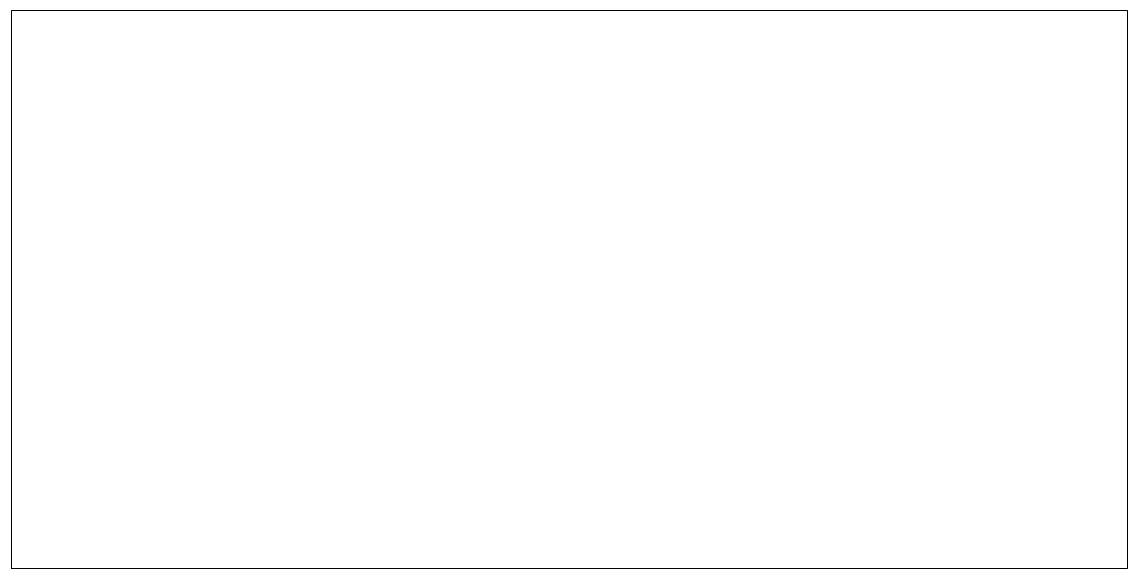

In [7]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})
(GMTSL_r1[209]-GMTSL_piC_yearmean).plot(ax=ax,x='nav_lon', y='nav_lat'
                   ,cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='sla'),vmin=-0.6,vmax=0.6)



ax.gridlines()
ax.add_feature(cartopy.feature.LAND,facecolor='white',zorder=100, edgecolor='k')
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('signal')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

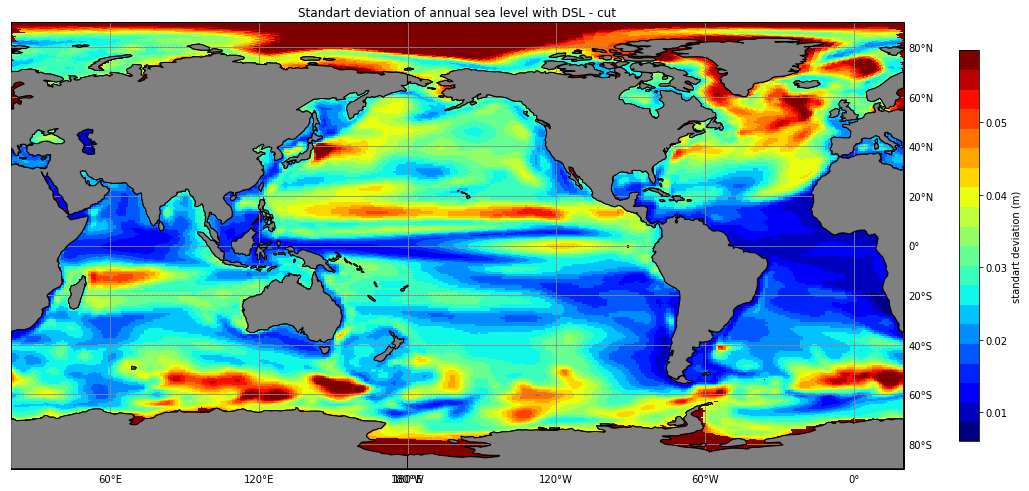

In [14]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})
SD_piC_DSL_CUT[:,:].plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('jet', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.6,label='standart deviation (m)'))



ax.gridlines()
ax.add_feature(cartopy.feature.LAND,facecolor='white',zorder=100, edgecolor='k')
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('Standart deviation of annual sea level with DSL - cut')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

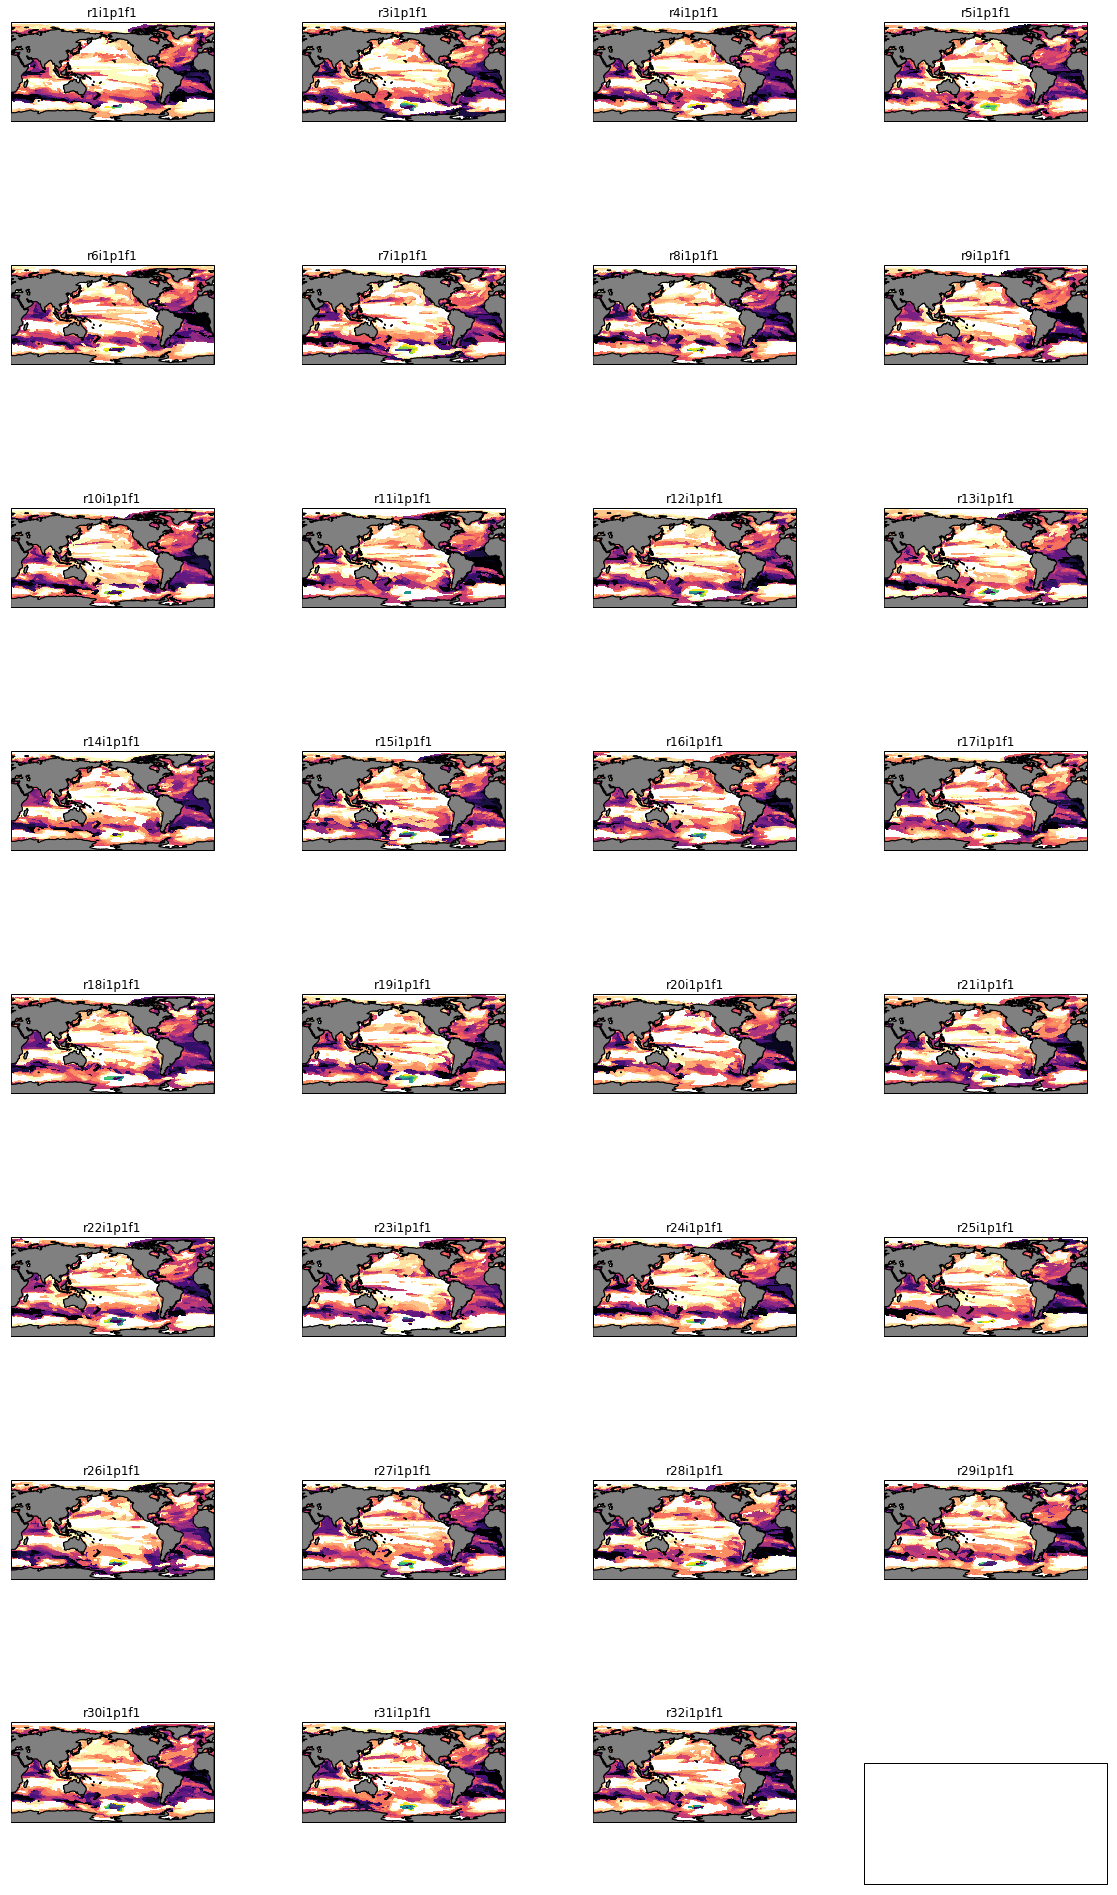

In [12]:
fig,axes = plt.subplots(8,4,figsize=(20,35), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

AXES=[]
for i in range(8):
    for j in range(4):
        AXES.append(axes[i,j])



for i in range(31):
    im= ToE_pos[i].plot(ax=AXES[i],x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 18),cbar_kwargs=dict(orientation='horizontal',shrink=0.2,label=''),#plt.cm.get_cmap('turbo', 20)
                            transform=ccrs.PlateCarree())
    im_neg=ToE_neg[i].plot(ax=AXES[i],x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 18),cbar_kwargs=dict(orientation='horizontal', shrink=0.2,label=''),#plt.cm.get_cmap('turbo', 20)
                            transform=ccrs.PlateCarree())
    cb=im.colorbar
    cb.remove()
    cbn=im_neg.colorbar
    cbn.remove()
    
    

for i in range(31) :
    ax=AXES[i]
    
    ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
    cs = ax.coastlines(resolution='110m', linewidth=1)
    if i==0 :
        ax.set_title('r'+str(i+1)+'i1p1f1')
    else : 
        ax.set_title('r'+str(i+2)+'i1p1f1')

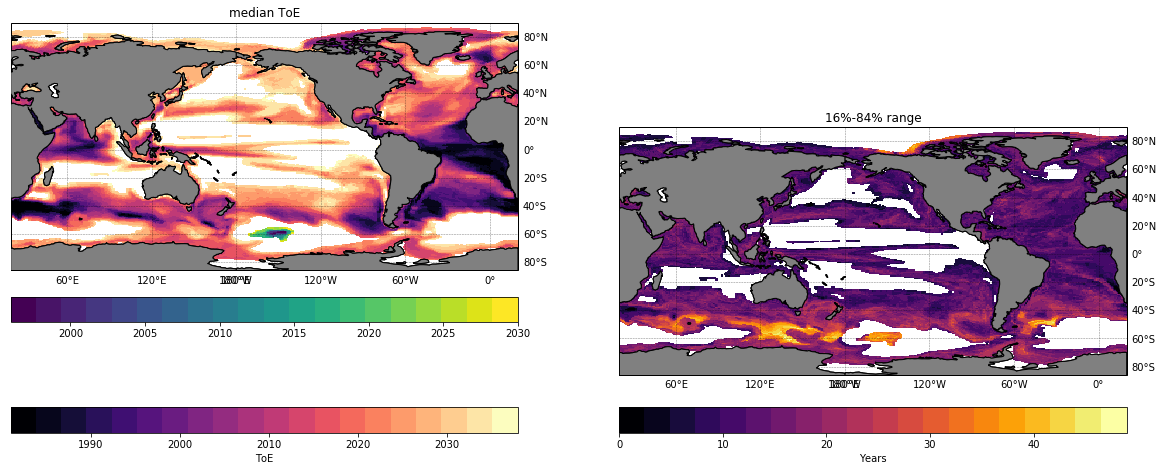

In [5]:
figTS,(ax1,ax2) = plt.subplots(1,2,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

median_ToE_pos.plot(ax=ax1,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='ToE'))

im = median_ToE_neg.plot(ax=ax1,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label=''))



range_16_84.plot(ax=ax2,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('inferno', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='Years'))




ax1.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
ax1.title.set_text('median ToE')

ax2.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
ax2.title.set_text('16%-84% range')

cs = ax1.coastlines(resolution='110m', linewidth=1)
cs = ax2.coastlines(resolution='110m', linewidth=1)

ax1.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax2.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

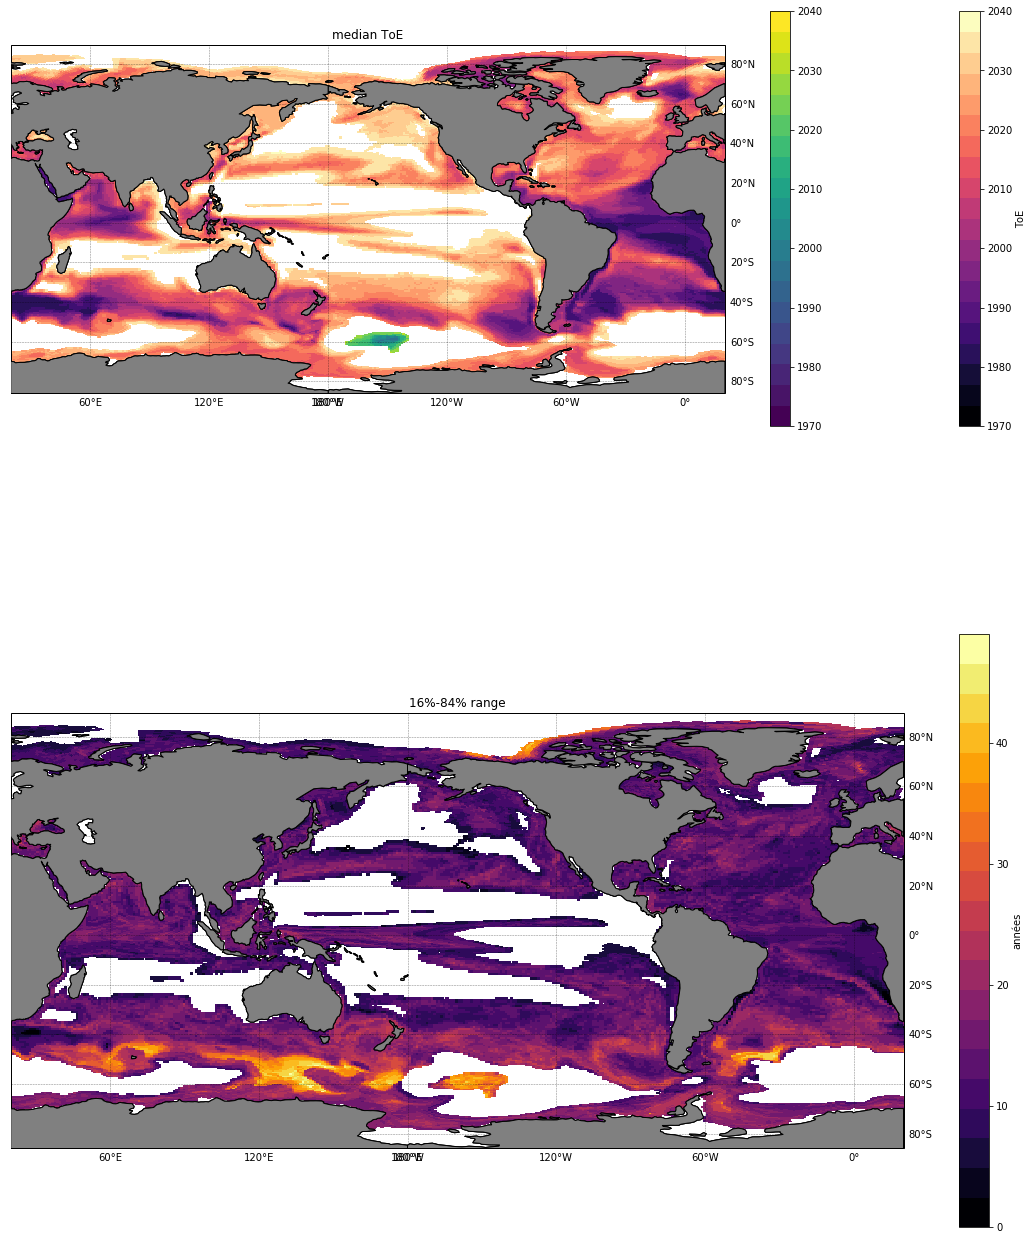

In [5]:
figTS,(ax1,ax2) = plt.subplots(2,1,figsize=(20,24), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

im = median_ToE_pos.plot(ax=ax1,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical',norm=colors.Normalize(vmin=1980,vmax=2040), pad=0.05, shrink=0.7, label='ToE'),vmin=1970,vmax=2040)


im = median_ToE_neg.plot(ax=ax1,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical',norm=colors.Normalize(vmin=1980,vmax=2040), pad=0.05, shrink=0.7, label=''),vmin=1970,vmax=2040)


range_16_84.plot(ax=ax2,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('inferno', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', pad=0.05, shrink=1, label='années'))




ax1.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
ax1.title.set_text('median ToE')

ax2.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
ax2.title.set_text('16%-84% range')

cs = ax1.coastlines(resolution='110m', linewidth=1)
cs = ax2.coastlines(resolution='110m', linewidth=1)

ax1.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax2.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

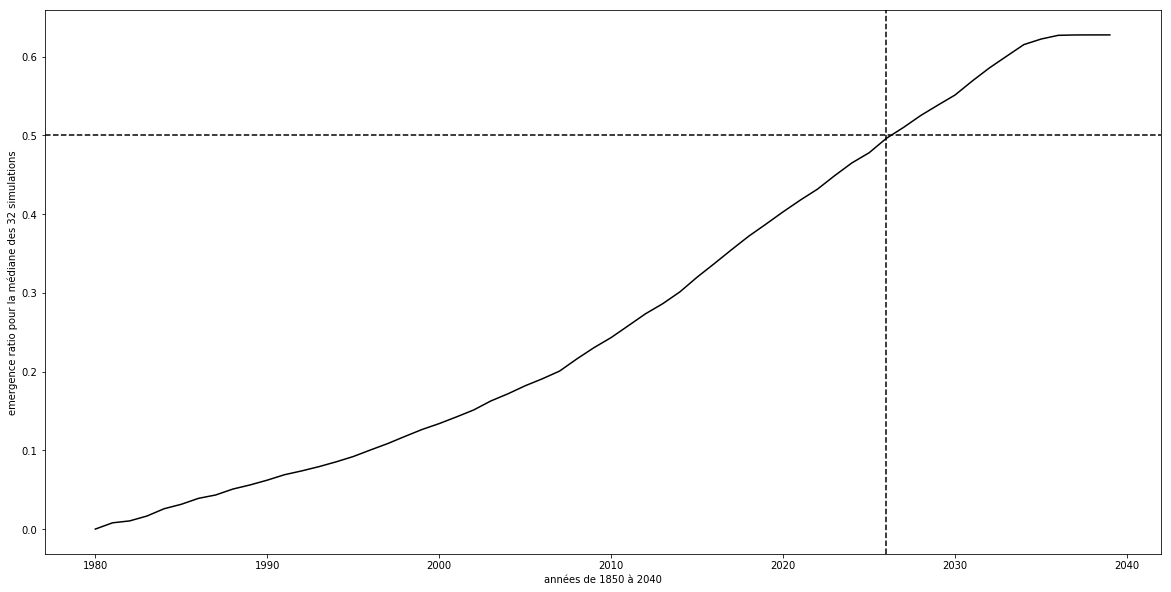

In [23]:
plt.figure(figsize=(20,10))
x = [i for i in range(1980,2040)]
  
plt.plot(x, emerge_ratio_gmtsl, "black")
plt.axhline(0.5,color='black',linestyle='--')
plt.axvline(2026,color='black',linestyle='--')


    
axes = plt.gca()
axes.set_xlabel('années de 1850 à 2040')
axes.set_ylabel('emergence ratio pour la médiane des 32 simulations')
plt.legend()
plt.show()

# SSP Comparaison

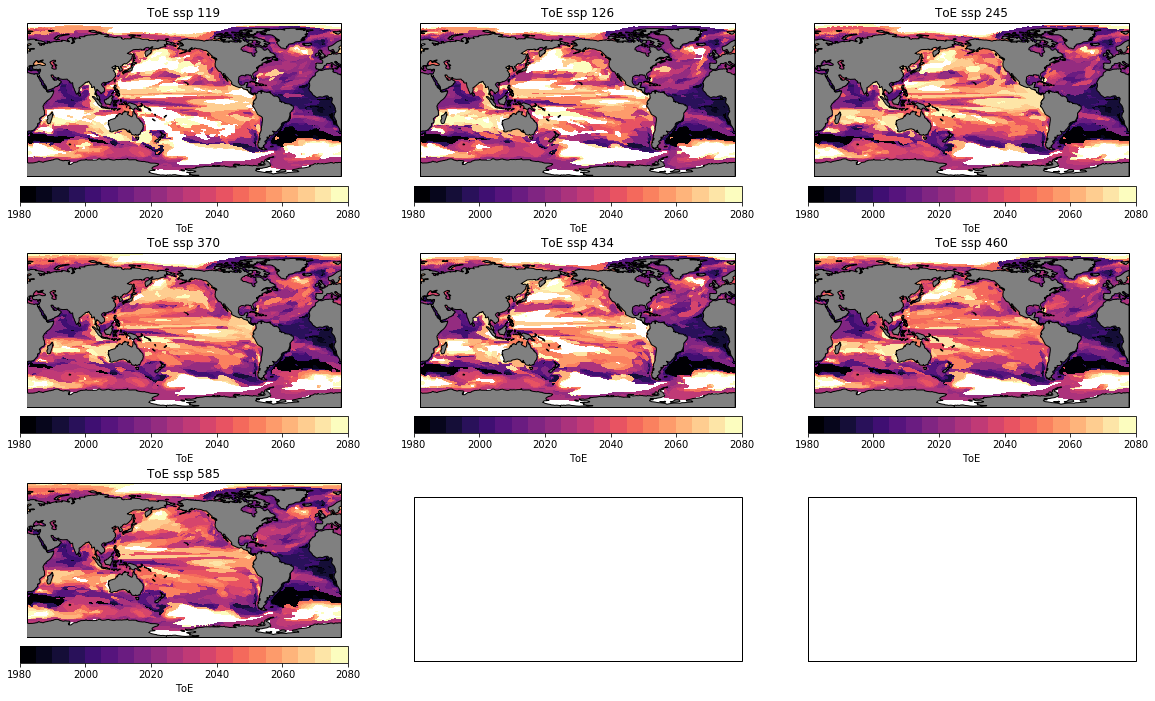

In [8]:
figTS,axes = plt.subplots(3,3,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

AXES=[]
for i in range(3):
    for j in range(3):
        AXES.append(axes[i,j])


ToE_pos_ssp119.plot(ax=AXES[0],x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='ToE'))

#ToE_neg_ssp119.plot(ax=AXES[0],x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)#                        
#                    transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='ToE'))


ToE_pos_ssp126.plot(ax=AXES[1],x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='ToE'))

#ToE_neg_ssp126.plot(ax=AXES[1],x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)
#                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='ToE'))


ToE_pos_ssp245.plot(ax=AXES[2],x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='ToE'))


ToE_pos_ssp370.plot(ax=AXES[3],x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='ToE'))

ToE_pos_ssp434.plot(ax=AXES[4],x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='ToE'))


ToE_pos_ssp460.plot(ax=AXES[5],x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='ToE'))

ToE_pos_ssp585.plot(ax=AXES[6],x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='ToE'))



                    
for i in range(7):
    AXES[i].add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')

AXES[0].title.set_text('ToE ssp 119')
AXES[1].title.set_text('ToE ssp 126')
AXES[2].title.set_text('ToE ssp 245')
AXES[3].title.set_text('ToE ssp 370')
AXES[4].title.set_text('ToE ssp 434')
AXES[5].title.set_text('ToE ssp 460')
AXES[6].title.set_text('ToE ssp 585')




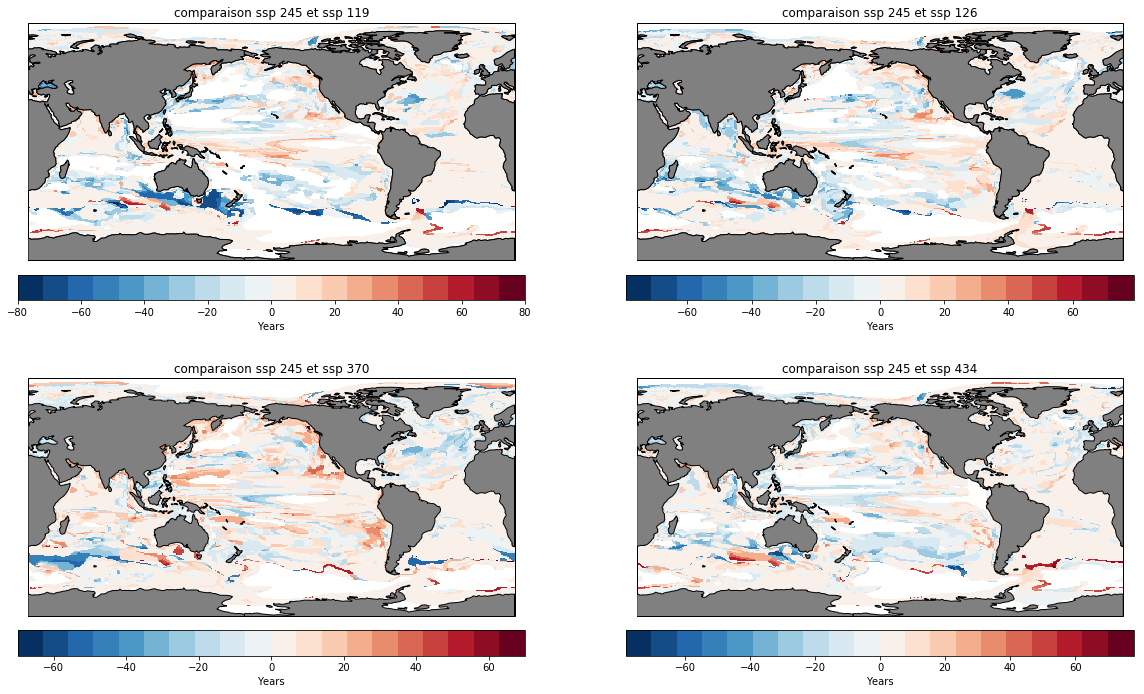

In [41]:
#Comparaison entre le scénarion "likely" ssp 245 et les autres scénarios
#Si un scénario est plus "grave", émerge en premier, alors son année de ToE sera plus basse 


figTS,([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})


(ToE_pos_ssp245 - ToE_pos_ssp119).plot(ax=ax1,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='Years'))

(ToE_pos_ssp245 - ToE_pos_ssp126).plot(ax=ax2,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='Years'))

(ToE_pos_ssp245 - ToE_pos_ssp370).plot(ax=ax3,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='Years'))

(ToE_pos_ssp245 - ToE_pos_ssp434).plot(ax=ax4,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='Years'))


ax1.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
ax1.title.set_text('comparaison ssp 245 et ssp 119')

ax2.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
ax2.title.set_text('comparaison ssp 245 et ssp 126')

ax3.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
ax3.title.set_text('comparaison ssp 245 et ssp 370')

ax4.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
ax4.title.set_text('comparaison ssp 245 et ssp 434')

cs = ax1.coastlines(resolution='110m', linewidth=1)
cs = ax2.coastlines(resolution='110m', linewidth=1)

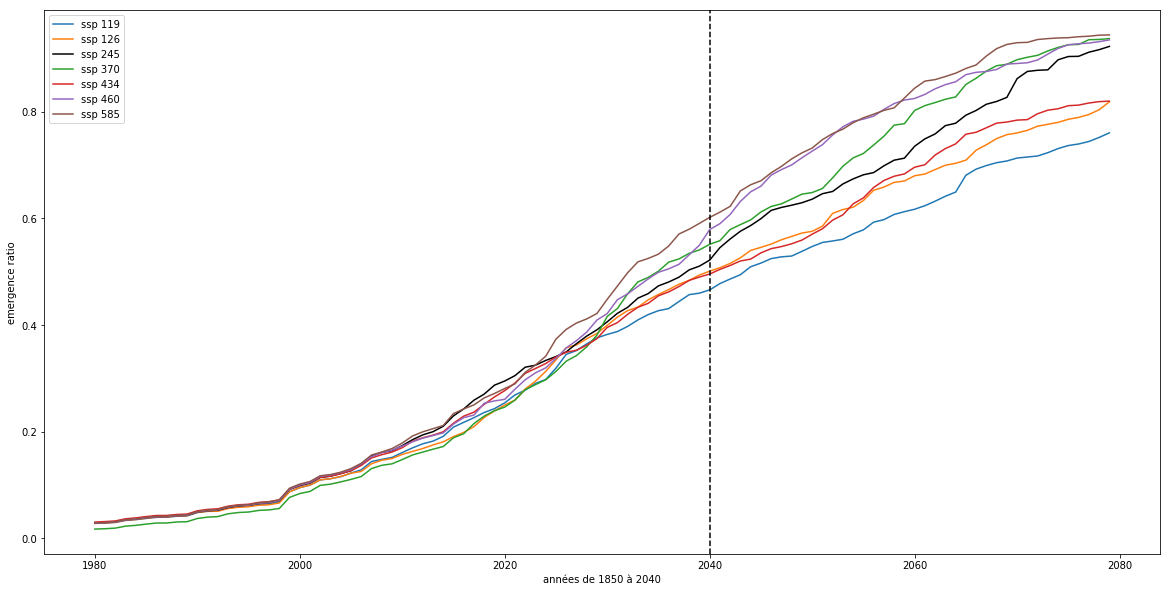

In [7]:
plt.figure(figsize=(20,10))
x = [i for i in range(1980,2080)]
  
plt.plot(x, emerge_ratio_ssp119[0:100], label='ssp 119')
plt.plot(x, emerge_ratio_ssp126, label='ssp 126')
plt.plot(x, emerge_ratio_ssp245, "black", label='ssp 245')
plt.plot(x, emerge_ratio_ssp370, label='ssp 370')
plt.plot(x, emerge_ratio_ssp434, label='ssp 434')
plt.plot(x, emerge_ratio_ssp460, label='ssp 460')
plt.plot(x, emerge_ratio_ssp585, label='ssp 585')
#plt.plot(x, emerge_ratio_32, "red", label='32 simulations')

plt.axvline(2040,color='black',linestyle='--')
    
axes = plt.gca()
axes.set_xlabel('années de 1850 à 2040')
axes.set_ylabel('emergence ratio')
plt.legend()
plt.show()